In [101]:
#importing library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#loading the dataset
df=pd.read_csv('/kaggle/input/starbucks-menu/starbucks_drinkMenu_expanded.csv')
df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [5]:
#checking for missing values
df.isna().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

df.info()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [14]:
df['Caffeine (mg)']=df['Caffeine (mg)'].replace('varies',np.NaN).replace('Varies',np.NaN).astype(np.float)

/tmp/ipykernel_32/2118469718.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['Caffeine (mg)']=df['Caffeine (mg)'].replace('varies',np.NaN).replace('Varies',np.NaN).astype(np.float)


In [16]:
df['Caffeine (mg)']=df['Caffeine (mg)'].fillna(df['Caffeine (mg)'].mean())

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

# Creating Labels

In [21]:
df['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [23]:
df['Tea']=df['Beverage_category'].apply(lambda x:1 if x=='Tazo® Tea Drinks' else 0)

In [24]:
#dropping the Bevaerage_category
df=df.drop('Beverage_category',axis=1)

In [26]:
df['Tea'].value_counts()

0    190
1     52
Name: Tea, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage                   242 non-null    object 
 1   Beverage_prep              242 non-null    object 
 2   Calories                   242 non-null    int64  
 3    Total Fat (g)             242 non-null    object 
 4   Trans Fat (g)              242 non-null    float64
 5   Saturated Fat (g)          242 non-null    float64
 6    Sodium (mg)               242 non-null    int64  
 7    Total Carbohydrates (g)   242 non-null    int64  
 8   Cholesterol (mg)           242 non-null    int64  
 9    Dietary Fibre (g)         242 non-null    int64  
 10   Sugars (g)                242 non-null    int64  
 11   Protein (g)               242 non-null    float64
 12  Vitamin A (% DV)           242 non-null    object 
 13  Vitamin C (% DV)           242 non-null    object 

In [11]:
df['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', nan, '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

# Encoding Values

In [28]:
{column:len(df[column].unique()) for column in df.columns}

{'Beverage': 33,
 'Beverage_prep': 13,
 'Calories': 48,
 ' Total Fat (g)': 24,
 'Trans Fat (g) ': 18,
 'Saturated Fat (g)': 4,
 ' Sodium (mg)': 9,
 ' Total Carbohydrates (g) ': 51,
 'Cholesterol (mg)': 75,
 ' Dietary Fibre (g)': 8,
 ' Sugars (g)': 70,
 ' Protein (g) ': 26,
 'Vitamin A (% DV) ': 11,
 'Vitamin C (% DV)': 10,
 ' Calcium (% DV) ': 14,
 'Iron (% DV) ': 18,
 'Caffeine (mg)': 35,
 'Tea': 2}

In [29]:
def onehot_encode(df,columns):
    df=df.copy()
    for column in columns:
        dummies=pd.get_dummies(df[column],prefix=column)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df
        

In [30]:
df=onehot_encode(df,['Beverage','Beverage_prep'])

In [39]:
df

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Tea,Beverage_Banana Chocolate Smoothie,Beverage_Brewed Coffee,Beverage_Caffè Americano,Beverage_Caffè Latte,Beverage_Caffè Mocha (Without Whipped Cream),Beverage_Cappuccino,Beverage_Caramel,Beverage_Caramel (Without Whipped Cream),Beverage_Caramel Apple Spice (Without Whipped Cream),Beverage_Caramel Macchiato,Beverage_Coffee,Beverage_Espresso,Beverage_Hot Chocolate (Without Whipped Cream),Beverage_Iced Brewed Coffee (With Classic Syrup),Beverage_Iced Brewed Coffee (With Milk & Classic Syrup),Beverage_Java Chip,Beverage_Java Chip (Without Whipped Cream),Beverage_Mocha,Beverage_Mocha (Without Whipped Cream),Beverage_Orange Mango Banana Smoothie,Beverage_Shaken Iced Tazo® Tea (With Classic Syrup),Beverage_Shaken Iced Tazo® Tea Lemonade (With Classic Syrup),Beverage_Skinny Latte (Any Flavour),Beverage_Strawberries & Crème (Without Whipped Cream),Beverage_Strawberry Banana Smoothie,Beverage_Tazo® Chai Tea Latte,Beverage_Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),Beverage_Tazo® Full-Leaf Tea Latte,Beverage_Tazo® Green Tea Latte,Beverage_Tazo® Tea,Beverage_Vanilla Bean (Without Whipped Cream),Beverage_Vanilla Latte (Or Other Flavoured Latte),Beverage_White Chocolate Mocha (Without Whipped Cream),Beverage_prep_2% Milk,Beverage_prep_Doppio,Beverage_prep_Grande,Beverage_prep_Grande Nonfat Milk,Beverage_prep_Short,Beverage_prep_Short Nonfat Milk,Beverage_prep_Solo,Beverage_prep_Soymilk,Beverage_prep_Tall,Beverage_prep_Tall Nonfat Milk,Beverage_prep_Venti,Beverage_prep_Venti Nonfat Milk,Beverage_prep_Whole Milk
0,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
238,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
239,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
240,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [42]:
for column in [column for column in df.columns if df[column].dtype=='object'][1:]:
    df[column]=df[column].apply(lambda x:x[:-1]).astype(np.float)

/tmp/ipykernel_32/921341313.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[column]=df[column].apply(lambda x:x[:-1]).astype(np.float)


In [52]:
df[' Total Fat (g)']=df[' Total Fat (g)'].replace('3 2','32')
df[' Total Fat (g)']=df[' Total Fat (g)'].astype(np.float)

/tmp/ipykernel_32/2731852465.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[' Total Fat (g)']=df[' Total Fat (g)'].astype(np.float)


In [54]:
df.isna().sum().sum()

0

# Splitting and Scaling

In [55]:
y=df['Tea']
x=df.drop('Tea',axis=1)

# Train Test Split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [59]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [61]:
x_test

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Beverage_Banana Chocolate Smoothie,Beverage_Brewed Coffee,Beverage_Caffè Americano,Beverage_Caffè Latte,Beverage_Caffè Mocha (Without Whipped Cream),Beverage_Cappuccino,Beverage_Caramel,Beverage_Caramel (Without Whipped Cream),Beverage_Caramel Apple Spice (Without Whipped Cream),Beverage_Caramel Macchiato,Beverage_Coffee,Beverage_Espresso,Beverage_Hot Chocolate (Without Whipped Cream),Beverage_Iced Brewed Coffee (With Classic Syrup),Beverage_Iced Brewed Coffee (With Milk & Classic Syrup),Beverage_Java Chip,Beverage_Java Chip (Without Whipped Cream),Beverage_Mocha,Beverage_Mocha (Without Whipped Cream),Beverage_Orange Mango Banana Smoothie,Beverage_Shaken Iced Tazo® Tea (With Classic Syrup),Beverage_Shaken Iced Tazo® Tea Lemonade (With Classic Syrup),Beverage_Skinny Latte (Any Flavour),Beverage_Strawberries & Crème (Without Whipped Cream),Beverage_Strawberry Banana Smoothie,Beverage_Tazo® Chai Tea Latte,Beverage_Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),Beverage_Tazo® Full-Leaf Tea Latte,Beverage_Tazo® Green Tea Latte,Beverage_Tazo® Tea,Beverage_Vanilla Bean (Without Whipped Cream),Beverage_Vanilla Latte (Or Other Flavoured Latte),Beverage_White Chocolate Mocha (Without Whipped Cream),Beverage_prep_2% Milk,Beverage_prep_Doppio,Beverage_prep_Grande,Beverage_prep_Grande Nonfat Milk,Beverage_prep_Short,Beverage_prep_Short Nonfat Milk,Beverage_prep_Solo,Beverage_prep_Soymilk,Beverage_prep_Tall,Beverage_prep_Tall Nonfat Milk,Beverage_prep_Venti,Beverage_prep_Venti Nonfat Milk,Beverage_prep_Whole Milk
0,-0.697406,-0.199873,-0.653927,-0.58083,-0.797054,-0.871287,-0.791530,0.137153,-0.776624,-0.671991,-0.524500,-0.26723,-0.125845,0.072114,-1.598321,-0.109435,-0.077152,-0.1557,-0.222911,-0.250785,-0.174608,-0.077152,-0.174608,-0.1557,-0.222911,-0.191859,-0.077152,-0.191859,-0.077152,-0.20787,-0.077152,-0.20787,-0.109435,-0.222911,-0.109435,0.0,-0.134433,-0.1557,-0.20787,-0.109435,-0.263857,4.486090,-0.250785,-0.250785,-0.109435,-0.109435,-0.250785,-0.263857,-0.556846,-0.077152,-0.1557,-0.312094,-0.134433,-0.237171,0.0,1.685500,-0.1557,-0.323381,-0.155700,-0.334428,-0.276465
1,-0.311228,0.126490,-0.596990,-0.58083,-0.797054,-0.624765,-0.500307,0.137153,-0.469967,-0.265889,-0.276554,-0.26723,0.212814,0.268684,-1.598321,-0.109435,-0.077152,-0.1557,-0.222911,-0.250785,-0.174608,-0.077152,-0.174608,-0.1557,-0.222911,-0.191859,-0.077152,-0.191859,-0.077152,-0.20787,-0.077152,-0.20787,-0.109435,-0.222911,-0.109435,0.0,-0.134433,-0.1557,-0.20787,-0.109435,-0.263857,4.486090,-0.250785,-0.250785,-0.109435,-0.109435,-0.250785,-0.263857,-0.556846,-0.077152,-0.1557,-0.312094,-0.134433,-0.237171,0.0,1.685500,-0.1557,-0.323381,-0.155700,-0.334428,-0.276465
2,-1.469763,-0.526236,-0.710863,-0.58083,-0.797054,-1.117808,-1.616662,-0.565236,-1.594379,-0.875042,-0.772445,-0.26723,-0.803161,-0.124455,-0.242937,-0.109435,-0.077152,-0.1557,-0.222911,-0.250785,5.727128,-0.077152,-0.174608,-0.1557,-0.222911,-0.191859,-0.077152,-0.191859,-0.077152,-0.20787,-0.077152,-0.20787,-0.109435,-0.222911,-0.109435,0.0,-0.134433,-0.1557,-0.20787,-0.109435,-0.263857,-0.222911,-0.250785,-0.250785,-0.109435,-0.109435,-0.250785,-0.263857,-0.556846,-0.077152,-0.1557,-0.312094,-0.134433,-0.237171,0.0,1.685500,-0.1557,-0.323381,-0.155700,-0.334428,-0.276465
3,1.426575,-0.036692,-0.255372,-0.58083,-0.797054,1.963714,1.975091,0.839541,1.983296,-0.265889,-0.524500,-0.26723,-0.125845,1.251531,0.931729,-0.109435,-0.077152,-0.1557,-0.222911,-0.250785,-0.174608,-0.077152,-0.174608,-0.1557,-0.222911,-0.191859,-0.077152,-0.191859,-0.077152,-0.20787,-0.077152,-0.20787,-0.109435,4.486090,-0.109435,0.0,-0.134433,-0.1557,-0.20787,-0.109435,-0.263857,-0.222911,-0.250785,-0.250785,-0.109435,-0.109435,-0.250785,-0.263857,-0.556846,-0.077152,-0.1557,-0.312094,-0.134433,-

In [62]:
x_train.shape

(169, 61)

In [65]:
inputs=tf.keras.Input(shape=(61,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.Model(inputs,outputs)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',
                                                                  tf.keras.metrics.AUC(name='auc')])


In [66]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 61)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                3968      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,193
Trainable params: 8,193
Non-trainable params: 0
_________________________________________________________________


In [84]:
history=model.fit(x_train,y_train,validation_split=0.2,batch_size=32,epochs=100,
                 callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)])

Epoch 1/100
5/5 [==============================] - 2s 113ms/step - loss: 0.6110 - accuracy: 0.6593 - auc: 0.6895 - val_loss: 0.4878 - val_accuracy: 0.8235 - val_auc: 0.8034
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 0.4947 - accuracy: 0.7481 - auc: 0.8673 - val_loss: 0.3985 - val_accuracy: 0.8824 - val_auc: 0.8724
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 0.4313 - accuracy: 0.7630 - auc: 0.9437 - val_loss: 0.3461 - val_accuracy: 0.8824 - val_auc: 0.9138
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 0.3874 - accuracy: 0.7704 - auc: 0.9722 - val_loss: 0.3129 - val_accuracy: 0.9118 - val_auc: 0.9517
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 0.3459 - accuracy: 0.8074 - auc: 0.9867 - val_loss: 0.2860 - val_accuracy: 0.9118 - val_auc: 0.9690
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 0.3037 - accuracy: 0.8667 - auc: 0.9937 - val_loss: 0.2619 - val_ac

In [85]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.0584 - accuracy: 0.9589 - auc: 0.9956


[0.058385685086250305, 0.9589040875434875, 0.9956011176109314]

In [93]:
y_pred=(np.squeeze(model.predict(x_test)>=0.5)).astype(np.int)

3/3 [==============================] - 0s 2ms/step


/tmp/ipykernel_32/1449608646.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred=(np.squeeze(model.predict(x_test)>=0.5)).astype(np.int)


In [96]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[61  1]
 [ 2  9]]


# Checking Confusion Matrix

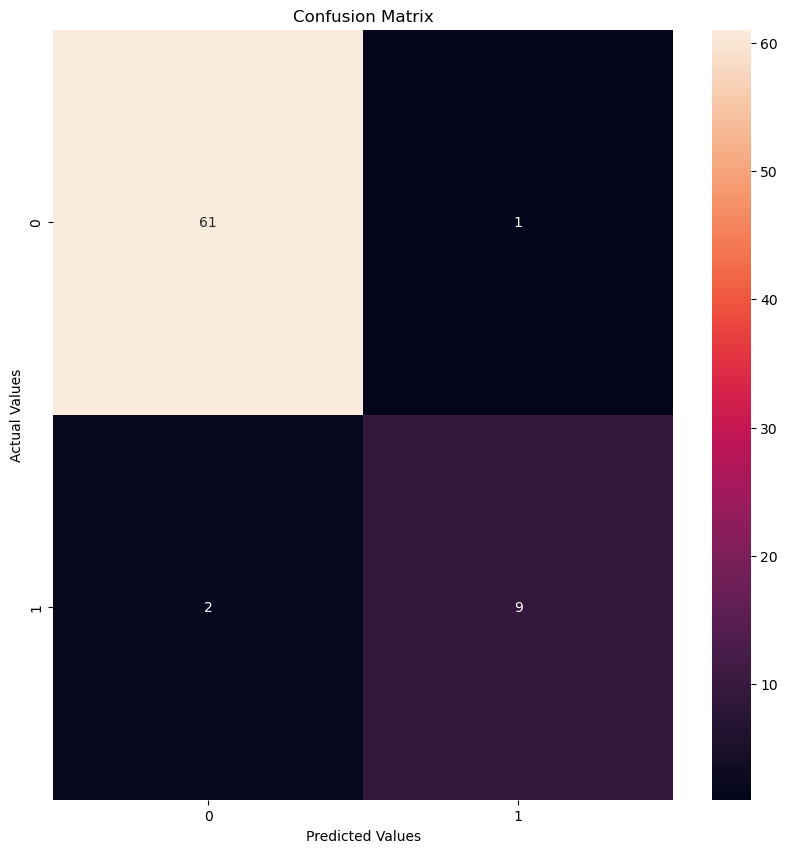

In [106]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,fmt='g',annot=True,)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [83]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(169, 61)
(73, 61)
(169,)
(73,)


In [79]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 61 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Calories                                                      169 non-null    float64
 1    Total Fat (g)                                                169 non-null    float64
 2   Trans Fat (g)                                                 169 non-null    float64
 3   Saturated Fat (g)                                             169 non-null    float64
 4    Sodium (mg)                                                  169 non-null    float64
 5    Total Carbohydrates (g)                                      169 non-null    float64
 6   Cholesterol (mg)                                              169 non-null    float64
 7    Dietary Fibre (g)                                            169 non-n